In [138]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [139]:
df = pd.read_csv("Melbourne_Housing.csv")

**View the first and last 5 rows of the dataset**

In [140]:
df.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
0,Airport West,3,t,Nelson,03-09-2016,13.500,3042.000,3.000,2.000,1.000,303.000,225,2016.000,Western Metropolitan,3464,840000
1,Albert Park,2,h,hockingstuart,03-09-2016,3.300,3206.000,2.000,1.000,0.000,120.000,82,1900.000,Southern Metropolitan,3280,1275000
2,Albert Park,2,h,Thomson,03-09-2016,3.300,3206.000,2.000,1.000,0.000,159.000,inf,NaN,Southern Metropolitan,3280,1455000
3,Alphington,4,h,Brace,03-09-2016,6.400,3078.000,3.000,2.000,4.000,853.000,263,1930.000,Northern Metropolitan,2211,2000000
4,Alphington,3,h,Jellis,03-09-2016,6.400,3078.000,3.000,2.000,2.000,208.000,inf,2013.000,Northern Metropolitan,2211,1110000


In [141]:
df.tail()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
27109,Noble Park,3,h,C21,30-09-2017,22.700,3174.000,3.000,1.000,6.000,569.000,130,1959.000,South-Eastern Metropolitan,11806,627500
27110,Reservoir,3,u,RW,30-09-2017,12.000,3073.000,3.000,1.000,1.000,NaN,105,1990.000,Northern Metropolitan,21650,475000
27111,Roxburgh Park,4,h,Raine,30-09-2017,20.600,3064.000,4.000,2.000,2.000,NaN,225,1995.000,Northern Metropolitan,5833,591000
27112,Springvale South,3,h,Harcourts,30-09-2017,22.200,3172.000,3.000,2.000,1.000,544.000,NaN,NaN,South-Eastern Metropolitan,4054,780500
27113,Westmeadows,4,h,Barry,30-09-2017,16.500,3049.000,4.000,2.000,6.000,813.000,140,1960.000,Northern Metropolitan,2474,791000


**Understand the shape of the dataset**

In [142]:
# checking shape of the data
print("There are", df.shape[0], "rows and", df.shape[1], "columns")

There are 27114 rows and 16 columns


**Check the data types of the columns for the dataset**

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27114 non-null  object 
 1   Rooms          27114 non-null  int64  
 2   Type           27114 non-null  object 
 3   SellerG        27114 non-null  object 
 4   Date           27114 non-null  object 
 5   Distance       27113 non-null  float64
 6   Postcode       27113 non-null  float64
 7   Bedroom        20678 non-null  float64
 8   Bathroom       20672 non-null  float64
 9   Car            20297 non-null  float64
 10  Landsize       17873 non-null  float64
 11  BuildingArea   10543 non-null  object 
 12  YearBuilt      11985 non-null  float64
 13  Regionname     27114 non-null  object 
 14  Propertycount  27114 non-null  int64  
 15  Price          27114 non-null  int64  
dtypes: float64(7), int64(3), object(6)
memory usage: 3.3+ MB


* The dataset has 10 numeric columns and 6 columns stored as objects.

* The date column is currently stored as an object, but it really should be converted into a datetime type.

* The BuildingArea column is also stored as an object, but it should actually be a numeric column.

* Several columns have missing values, which may need attention before analysis:

        Distance → 1 missing value
        Postcode → 1 missing value
        Bedroom → 6,436 missing values
        Bathroom → 6,442 missing values
        Car → 6,817 missing values
        Landsize → 9,241 missing values
        BuildingArea → 16,571 missing values
        YearBuilt → 15,129 missing values

The other columns (Suburb, Rooms, Type, SellerG, Date, Regionname, Propertycount, Price) have no missing values.

In [144]:
# Changing the date column to a datetime datatype.
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")

In [145]:
# let's see why BuildingArea column has object data type
df['BuildingArea'].unique()

array(['225', '82', 'inf', '263', '242', '251', '117', 'missing', '76',
       '399', '118', '103', '180', '123', '218', '129', '167', '154',
       '275', '121', nan, '125', '255', '75', '156', '240', '268', '108',
       '69', '140', '214', '253', '189', '215', '96', '104', '100', '313',
       '144', '93', '110', '70', '122', '51', '147', '113', '83', '56',
       '137', '85', '64', '175', '3558', '170', '265', '353', '138', '19',
       '116', '87', '74', '320', '300', '210', '120', '86', '97', '200',
       '106', '14', '161', '128', '185', '146', '133', '115', '143',
       '150', '195', '236', '276', '188', '179', '249', '141', '34', '73',
       '107', '84', '81', '207', '50', '264', '312', '235', '221', '183',
       '132', '160', '186', '78', '105', '145', '62', '220', '315', '181',
       '61', '112', '420', '226', '266', '410', '449', '356', '477',
       '250', '95', '190', '284', '247', '213', '209', '119', '111',
       '130', '348', '166', '44', '176', '98', '159', '79'

In [146]:
df['BuildingArea'].nunique()

655

In [147]:
df['BuildingArea'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 27114 entries, 0 to 27113
Series name: BuildingArea
Non-Null Count  Dtype 
--------------  ----- 
10543 non-null  object
dtypes: object(1)
memory usage: 212.0+ KB


* It will be difficult to analyze each data point to find the categorical values in this column. Instead, we’ll check how many non-numeric entries exist in this column and review what they are.

In [148]:
df['BuildingArea'].apply(type).value_counts()

BuildingArea
<class 'float'>    16571
<class 'str'>      10543
Name: count, dtype: int64

Here’s what the above means, step by step:

    <class 'float'> 16571
        There are 16,571 entries in the BuildingArea column that are of float type.
        These are NaN values in this column, and are special floats representing missing data.

    <class 'str'> 10543
        There are 10,543 entries that are strings.
        These entries may include numbers stored as text (e.g., "105") or invalid entries such as "missing" or "inf".
        Numeric operations cannot be performed on them until they are converted to proper numeric types.

In [149]:
# Convert to numeric, flagging errors
numeric_converted = pd.to_numeric(df['BuildingArea'], downcast='integer', errors="coerce")

# Count numeric vs non-numeric
num_count = numeric_converted.notna().sum()
non_num_count = numeric_converted.isna().sum()

print("Non-Numeric values:", non_num_count)
print("Numeric values:", num_count)

Non-Numeric values: 16580
Numeric values: 10534


We can make the following deductions By comparing the results of the two operations above:

* The column contains 10,543 string (<class 'str'>) entries, which is more than the 10,534 numeric values. Some of these strings represent non-numeric data wrapped in quotes (e.g., "missing"), so when using pd.to_numeric, pandas is unable to convert them and assigns NaN instead.
* As a result, the expected float count (<class 'float'>: 16,571) from .apply(type) does not match the non-numeric count from pd.to_numeric (16,580).
* This suggests that roughly 9 elements cannot be converted to numeric values, whereas the rest are strings representing numbers (e.g., wrapped in quotes) that pd.to_numeric can successfully convert.

Hence:
* Using pd.to_numeric(errors='coerce') gives a more accurate picture of which entries can be treated as truly numeric.

In [150]:
# replacing values with nan
df['BuildingArea'] = df['BuildingArea'].replace(['missing', 'inf'], np.nan)

# Change the dtype to float
df['BuildingArea'] = df['BuildingArea'].astype(float)

In [151]:
# Check again the number of numeric elements
numeric_converted = pd.to_numeric(df['BuildingArea'], downcast='integer', errors="coerce")

num_count = numeric_converted.notna().sum()
non_num_count = numeric_converted.isna().sum()

print("Non-Numeric values:", non_num_count)
print("Numeric values:", num_count)

Non-Numeric values: 16585
Numeric values: 10529


In [152]:
# let's check the data type of columns again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         27114 non-null  object        
 1   Rooms          27114 non-null  int64         
 2   Type           27114 non-null  object        
 3   SellerG        27114 non-null  object        
 4   Date           27114 non-null  datetime64[ns]
 5   Distance       27113 non-null  float64       
 6   Postcode       27113 non-null  float64       
 7   Bedroom        20678 non-null  float64       
 8   Bathroom       20672 non-null  float64       
 9   Car            20297 non-null  float64       
 10  Landsize       17873 non-null  float64       
 11  BuildingArea   10529 non-null  float64       
 12  YearBuilt      11985 non-null  float64       
 13  Regionname     27114 non-null  object        
 14  Propertycount  27114 non-null  int64         
 15  Price          2711

* The number of non-null float elements in BuildingArea now matches the 10,529 numeric values from our pd.to_numeric conversion, so the data is consistent.

* We see that the data types of Date and BuildingArea columns have been fixed.
* There are 11 numerical columns, 4 object type columns, and 1 date time column in the data.
* We observe that some columns have less entries that other columns (less than 27114 rows) which indicates the presence of missing values in the data.

**Checking for missing values in the data**

In [153]:
df.isnull().sum()

Suburb               0
Rooms                0
Type                 0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom           6436
Bathroom          6442
Car               6817
Landsize          9241
BuildingArea     16585
YearBuilt        15129
Regionname           0
Propertycount        0
Price                0
dtype: int64

* Before filling missing values, we first study how data is distributed and how features relate to each other. This helps us choose better ways to impute missing values (like using mean, median, or mode), keeping the data accurate and meaningful.

* Let's check for duplicates in the data

In [154]:
# I want to display the indexes pof all rows that are dupicated

# Create a helper column that represents the entire row
df['_row_sign'] = df.fillna('<<NA>>').astype(str).agg('||'.join, axis=1)

# Group by this "row signature"
groups = df.groupby('_row_sign', group_keys=False).apply(lambda x: x.index.tolist())

# Keep only groups with more than 1 row (true duplicates)
duplicate_groups = groups[groups.apply(len) > 1]

# Display them
for row_sig, idxs in duplicate_groups.items():
    print(f"Duplicate group: {idxs}")
    # display(df.loc[idxs])  # shows the actual rows


Duplicate group: [15787, 15788]
Duplicate group: [20302, 20303]
Duplicate group: [21416, 21417]
Duplicate group: [8495, 8496]
Duplicate group: [14869, 14870]
Duplicate group: [7271, 7272]
Duplicate group: [166, 167]
Duplicate group: [12570, 12571]
Duplicate group: [7398, 7399]
Duplicate group: [9943, 9944]
Duplicate group: [12005, 12006]


C:\Users\thech\AppData\Local\Temp\ipykernel_20768\2047043037.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  groups = df.groupby('_row_sign', group_keys=False).apply(lambda x: x.index.tolist())


In [155]:
df.duplicated().sum()

np.int64(11)

* There are 11 duplicate entries in the data. Let's remove them.

In [156]:
# dropping duplicate entries from the data
df.drop_duplicates(inplace=True)

# resetting the index of data frame since some rows will be removed
df.reset_index(drop=True, inplace=True)

In [157]:
# Check again for duplicates
df.duplicated().sum()

np.int64(0)

**Let's check the statistical summary of the data.**

In [158]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Rooms,27103.000,2.992,1.000,2.000,3.000,4.000,16.000,0.955
Date,27103,2017-05-23 12:25:09.441759488,2016-01-28 00:00:00,2016-11-19 00:00:00,2017-07-08 00:00:00,2017-10-28 00:00:00,2018-03-17 00:00:00,NaN
Distance,27102.000,11.280,0.000,6.400,10.500,14.000,48.100,6.784
Postcode,27102.000,3113.787,3000.000,3046.000,3088.000,3153.000,3978.000,111.129
Bedroom,20678.000,3.046,0.000,2.000,3.000,4.000,20.000,0.955
Bathroom,20672.000,1.592,0.000,1.000,1.000,2.000,9.000,0.701
Car,20297.000,1.716,0.000,1.000,2.000,2.000,18.000,0.994
Landsize,17873.000,560.537,50.000,220.000,513.000,664.000,76000.000,1411.309
BuildingArea,10529.000,154.512,11.000,101.000,133.000,183.000,6791.000,130.584
YearBuilt,11985.000,1966.618,1850.000,1950.000,1970.000,2000.000,2019.000,36.042


* `Rooms:` On average there are 3 rooms in a property. 75% of the properties have less than or equal to 4 rooms. Maximum numer of rooms at 16 is unusually high, especially when you consider most houses cluster around the mean of around 3 rooms (std = 0.955), this highlights the possible presence of outliers or luxury properties and warrants a quick check.
* `Distance`: On average the properties are located within 11.28 Kms of central business district, while the median is 10.5 Kms. There is a huge difference between the maximum value and the 75% percentile of the data which indicates there might be outliers present in this column.  
* `Bedroom`, `Bathroom`, `Car`: The distribution of the number of bedrooms, bathrooms, and car parking spaces is fine. The maximum values of these columns might require a quick check.
* `Landsize`: The std of 1411.309 indicates extremely high variability in land sizes. Most land sizes are around 500–600 sqm, but some are huge (up to 76,000 sqm). This is a very skewed distribution and its worth considering log-transform or handling extreme values (P.s Logarithm reduces the impact of large numbers, distribution becomes more symmetric, std decreases, mean better represents typical cases.)
* `YearBuilt`: The latest property was built in 2019 while the earliest property was built in 1850.
* `Propertycount`: On average a suburb has around 7564 properties. The column has a large standard deviation of 4494.02 units.
* `Price`: On average the house prices are AUD 1050664. The median prices are AUD 871000. There is a huge difference between the maximum value and the 75% percentile of the data which indicates there might be outliers present in this column.

**Let's check the count and percentage of categorical levels in each column**

In [159]:
# Making a list of all categorical variables
cat_cols =  ['Suburb', 'Type', 'SellerG', 'Regionname']

for columns in cat_cols:
    print(df[columns].value_counts())
    print("-" * 50)

Suburb
Reservoir         724
Bentleigh East    493
Richmond          437
Preston           410
Brunswick         383
                 ... 
Darley              1
Eynesbury           1
croydon             1
Monbulk             1
viewbank            1
Name: count, Length: 345, dtype: int64
--------------------------------------------------
Type
h    18394
u     5882
t     2827
Name: count, dtype: int64
--------------------------------------------------
SellerG
Nelson           2733
Jellis           2516
Barry            2385
hockingstuart    2096
Ray              1574
                 ... 
Alex                1
Benchmark           1
Gellibrand          1
White               1
Icon                1
Name: count, Length: 347, dtype: int64
--------------------------------------------------
Regionname
Southern Metropolitan         8480
Northern Metropolitan         7809
Western Metropolitan          5792
Eastern Metropolitan          3264
South-Eastern Metropolitan    1336
Northern Victoria   

In [160]:
# Printing the percentage of unique categorical levels in each column
for column in cat_cols:
    print(df[column].value_counts(normalize=True))
    print("-" * 50)

Suburb
Reservoir        0.027
Bentleigh East   0.018
Richmond         0.016
Preston          0.015
Brunswick        0.014
                  ... 
Darley           0.000
Eynesbury        0.000
croydon          0.000
Monbulk          0.000
viewbank         0.000
Name: proportion, Length: 345, dtype: float64
--------------------------------------------------
Type
h   0.679
u   0.217
t   0.104
Name: proportion, dtype: float64
--------------------------------------------------
SellerG
Nelson          0.101
Jellis          0.093
Barry           0.088
hockingstuart   0.077
Ray             0.058
                 ... 
Alex            0.000
Benchmark       0.000
Gellibrand      0.000
White           0.000
Icon            0.000
Name: proportion, Length: 347, dtype: float64
--------------------------------------------------
Regionname
Southern Metropolitan        0.313
Northern Metropolitan        0.288
Western Metropolitan         0.214
Eastern Metropolitan         0.120
South-Eastern Metropolitan

* `The Suburbs Feature:` It has as very high cardinality (345 unique suburbs). Highest number of properties by Suburbs are in Reservoir (724) followed by Bentleigh East (493) and Richmond (437). Many suburbs appear only once, showing a possibility of a long-tail distribution.
* `The Type Feature:` Property Type is heavily imbalanced. With houses of type ‘h’ that is houses/cottages/villas dominating ~67% of listings, while units (‘u’) make up 21% properties and townhouses (‘t’) make up ~10%. We will need to pay attention to this imbalance and how it could affect modeling. 
* `The SellerG Feature:` Top 5 sellers of properties are  - Nelson, Jellis, Barry, hockingstuart, and Ray. And it apperas the feature might be very skewed with a few sellers accounting for thousands of listings, but many sellers appear very infrequently. Encoding strategies like grouping low-frequency sellers may be necessary to avoid sparse categorical representations.
* `The Regionname Feature:` This shows uneven distribution, with metropolitan regions heavily represented compared to regional areas. 31% of the properties are in Southern Metropolitan followed by 28% in Northern Metropolitan, and 21% in Western Metropolitan. This shows that our analysis and models trained on this data will be biased towards metropolitan properties than Victoria regions as around 98% of the data points are from Metropolitan region.

### Univariate Analysis

**Let's check the distribution for numerical columns.**

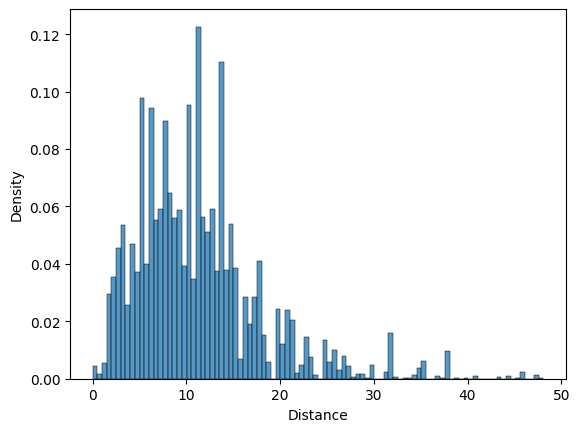

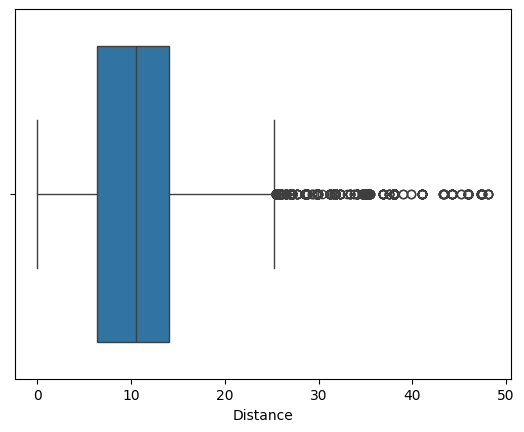

In [161]:
sns.histplot(data=df,x='Distance',stat='density')
plt.show()
sns.boxplot(data=df,x='Distance')
plt.show()

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27103 entries, 0 to 27102
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         27103 non-null  object        
 1   Rooms          27103 non-null  int64         
 2   Type           27103 non-null  object        
 3   SellerG        27103 non-null  object        
 4   Date           27103 non-null  datetime64[ns]
 5   Distance       27102 non-null  float64       
 6   Postcode       27102 non-null  float64       
 7   Bedroom        20678 non-null  float64       
 8   Bathroom       20672 non-null  float64       
 9   Car            20297 non-null  float64       
 10  Landsize       17873 non-null  float64       
 11  BuildingArea   10529 non-null  float64       
 12  YearBuilt      11985 non-null  float64       
 13  Regionname     27103 non-null  object        
 14  Propertycount  27103 non-null  int64         
 15  Price          2710

* The distribution is skewed towards right.
* There are many outliers present in this column.
* Values above 25 Kms are being represented as outliers in the boxplot, indicating there there are many properties that are atleast 25 Kms away from CBD.

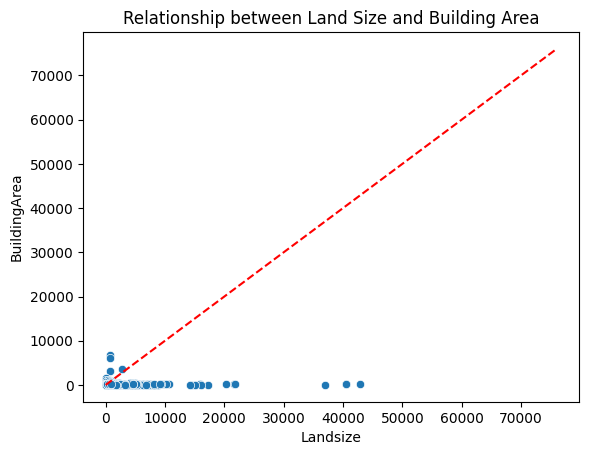

In [163]:
sns.scatterplot(data=df, x='Landsize', y='BuildingArea')

# Add the diagonal reference line
max_val = max(df['Landsize'].max(), df['BuildingArea'].max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--')

plt.title('Relationship between Land Size and Building Area')
plt.show()

**Observations on LandSize vs BuildingArea**

*  We had expected that most points fall below the diagonal line y = x (because BuildingArea < LandSize).

*  But we are observing that there are points above the diagonal line, which means that there might be data errors.

In [164]:
Test = df.loc[df['BuildingArea'] > df['Landsize'], ['BuildingArea', 'Landsize']]
print(Test)

       BuildingArea  Landsize
9            76.000    50.000
16          103.000    50.000
50           69.000    50.000
61           96.000    50.000
63          100.000    50.000
...             ...       ...
27029        72.000    50.000
27035       112.000    50.000
27055        81.000    50.000
27060       114.000    50.000
27071       125.000    50.000

[1213 rows x 2 columns]


*  There are about 1213 entries where the BuildingArea > LandSize. This needs to be flagged and investigated

### Bivariate Analysis

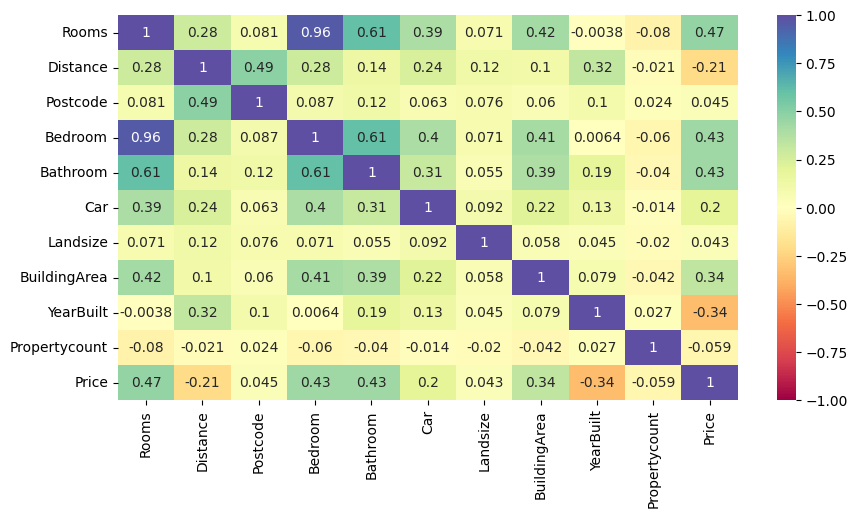

In [165]:
plt.figure(figsize=(10,5))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1)
plt.show()

### Missing value treatment

**Lets see the count and the percentage of missing values in each column**

In [166]:
pd.DataFrame({'Count_missing':df.isnull().sum()[df.isnull().sum()>0],'Percentage_missing':(df.isnull().sum()[df.isnull().sum()>0]/df.shape[0])*100})

,Count_missing,Percentage_missing
Distance,1,0.004
Postcode,1,0.004
Bedroom,6425,23.706
Bathroom,6431,23.728
Car,6806,25.112
Landsize,9230,34.055
BuildingArea,16574,61.152
YearBuilt,15118,55.780


* BuildingArea and YearBuilt columns have the highest percentage of missing values.
* Distance and Postcode have the least number of missing values.
* Bedroom, Bathroom, and Car have almost equal percentage of missing values.
* AgeofProp and Total Space has equal percentage of missing values as YearBuilt and Bedroom, Bathroom, and Car because the information here were extracted using these columns.
* Landsize has around 34% missing values.

* Let’s take a look at the other columns when Distance is missing

In [167]:
df.loc[df['Distance'].isnull()]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,_row_sign
9590,Fawkner Lot,3,h,Brad,2018-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,962,616000,Fawkner Lot||3||h||Brad||2018-01-06||<<NA>>||<...


* When Distance is missing, many other key columns like Bedroom, Bathroom, Car, Landsize, BuildingArea, YearBuilt, and _row_sign are also missing. Only a few fields like Postcode, Regionname, and Propertycount remain populated.
* This suggests a common issue in data collection, where missing values are not random but follow a pattern. 
* Let's see if we can find more information using the name of the Suburb. 

In [168]:
df.loc[df['Suburb'] == 'Fawkner Lot']

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,_row_sign
9590,Fawkner Lot,3,h,Brad,2018-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,962,616000,Fawkner Lot||3||h||Brad||2018-01-06||<<NA>>||<...


* We see that there is only one data entry for the Fawkner Lot suburb and in this case it is possible that data for this suburb was not collected. This shows that data is not missing randomly rather has pattern in missingness.
* Imputing the Distance as well other information will not be a suitable approach as the imputed values will not be reliable. Given this, we can safely drop this particular entry.

In [169]:
# Drop rows where Distance is null
df.drop(df[df['Distance'].isnull()].index, axis=0, inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)

In [170]:
# Lets check again for the count and the percentage of missing values in each column
pd.DataFrame({'Count_missing':df.isnull().sum()[df.isnull().sum()>0],'Percentage_missing':(df.isnull().sum()[df.isnull().sum()>0]/df.shape[0])*100})

,Count_missing,Percentage_missing
Bedroom,6424,23.703
Bathroom,6430,23.725
Car,6805,25.109
Landsize,9229,34.053
BuildingArea,16573,61.150
YearBuilt,15117,55.778


In [171]:
# extracting all the information of other variable where Bedroom is null
df.loc[df['Bedroom'].isnull()]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,_row_sign
8,Altona North,4,h,hockingstuart,2016-09-03,11.100,3025.000,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,5132,857500,Altona North||4||h||hockingstuart||2016-09-03|...
12,Ashburton,2,h,Marshall,2016-09-03,11.000,3147.000,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,3052,1820000,Ashburton||2||h||Marshall||2016-09-03||11.0||3...
14,Avondale Heights,4,h,Jellis,2016-09-03,10.500,3034.000,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,4502,1310000,Avondale Heights||4||h||Jellis||2016-09-03||10...
25,Balwyn North,4,u,hockingstuart,2016-09-03,9.200,3104.000,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,7809,1450000,Balwyn North||4||u||hockingstuart||2016-09-03|...
26,Balwyn North,2,h,Fletchers,2016-09-03,9.200,3104.000,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,7809,1305000,Balwyn North||2||h||Fletchers||2016-09-03||9.2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27088,Footscray,2,u,McGrath,2017-09-30,5.100,3011.000,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,7570,455500,Footscray||2||u||McGrath||2017-09-30||5.1||301...
27089,Forest Hill,2,h,Fletchers,2017-09-30,15.400,3131.000,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Metropolitan,4385,762000,Forest Hill||2||h||Fletchers||2017-09-30||15.4...
27090,Glen Waverley,3,u,Ray,2017-09-30,16.700,3150.000,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Metropolitan,15321,1100000,Glen Waverley||3||u||Ray||2017-09-30||16.7||31...
27093,Kingsbury,2,t,RW,2017-09-30,12.100,3083.000,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,1414,512000,Kingsbury||2||t||RW||2017-09-30||12.1||3083.0|...


In [172]:
# Lets do a count of all rows where Bedroom, Bathroom, Car, Landsize, BuildingArea, YearBuilt have NaN values
cols = ['Bedroom', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']

# Select rows where all these columns are NaN
rows_with_all_nan = df.loc[df[cols].isnull().all(axis=1)]

# Count rows where all selected columns are NaN
count = df[cols].isnull().all(axis=1).sum()
print(count)

6418


* There are 6,418 records where all key property features (Bedroom, Bathroom, Car, Landsize, BuildingArea, YearBuilt) are missing. This indicates a substantial portion of incomplete listings that may need to be removed or handled carefully in analysis.

In [173]:
# Suburb and seller information for rows where all key features are missing
nan_missing = df.loc[df[cols].isnull().all(axis=1), ['Suburb', 'SellerG']]
nan_missing.isnull().sum()

Suburb     0
SellerG    0
dtype: int64

* All rows where key features (Bedroom, Bathroom, Car, Landsize, BuildingArea, YearBuilt) are missing still have Suburb and SellerG filled, showing that some basic information is available even though most property details are missing.

* I will drop all rows where Bedroom, Bathroom, Car, Landsize, BuildingArea, and YearBuilt have missing values. Its okay to do so because these rows lack key property information needed for analysis.

In [174]:
cols = ['Bedroom', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']

# We get the index of the rows where all these columns are NaN
rows_to_drop = df.loc[df[cols].isnull().all(axis=1)].index

# Drop those rows
df.drop(rows_to_drop, inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)

In [177]:
# Lets check again for the count and the percentage of missing values in each column
pd.DataFrame({'Count_missing':df.isnull().sum()[df.isnull().sum()>0],'Percentage_missing':(df.isnull().sum()[df.isnull().sum()>0]/df.shape[0])*100})

,Count_missing,Percentage_missing
Bedroom,6,0.029
Bathroom,12,0.058
Car,387,1.871
Landsize,2811,13.590
BuildingArea,10155,49.096
YearBuilt,8699,42.057


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20684 entries, 0 to 20683
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         20684 non-null  object        
 1   Rooms          20684 non-null  int64         
 2   Type           20684 non-null  object        
 3   SellerG        20684 non-null  object        
 4   Date           20684 non-null  datetime64[ns]
 5   Distance       20684 non-null  float64       
 6   Postcode       20684 non-null  float64       
 7   Bedroom        20678 non-null  float64       
 8   Bathroom       20672 non-null  float64       
 9   Car            20297 non-null  float64       
 10  Landsize       17873 non-null  float64       
 11  BuildingArea   10529 non-null  float64       
 12  YearBuilt      11985 non-null  float64       
 13  Regionname     20684 non-null  object        
 14  Propertycount  20684 non-null  int64         
 15  Price          2068